In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# データの読み込み(cifar10)

データセット全体  
・5万枚の訓練データ  
・1万枚のテストデータ  
画像  
・幅32×高さ32px  
・RGBフルカラー画像(0~255)

In [3]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("x_train: ", x_train.shape, "t_train: ", t_train.shape, "x_test:" , x_test.shape, "t_test: ", t_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train:  (50000, 32, 32, 3) t_train:  (50000, 1) x_test: (10000, 32, 32, 3) t_test:  (10000, 1)


ラベル  
0:airplane  
1:automobile  
2:bird  
3:cat  
4:deer  
5:dog  
6:frog  
7:horse  
8:ship  
9:truck  

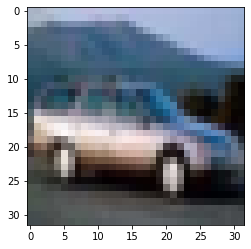

In [4]:
for i in range(50000):
    if t_train[i] == 1:
        plt.imshow(x_train[i])
        break;

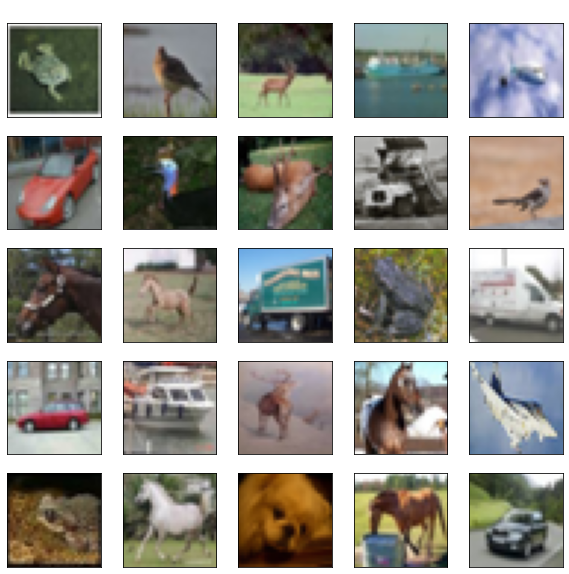

In [5]:
cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10, 10))
for i in range(n_image):
    cifar_img = plt.subplot(5, 5, i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label, fontdict={"color":"white"})
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

# one-hot表現

tf.keras.utils.to_categorical(y, num_classes)  
y：one-hot表現させたい答えラベルの配列  
num_classes：ラベルの数

In [6]:
n_class = 10
t_train = tf.keras.utils.to_categorical(t_train, n_class)
t_test = tf.keras.utils.to_categorical(t_test, n_class)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


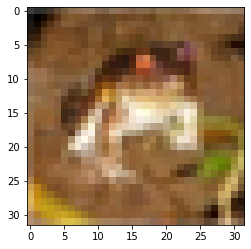

In [7]:
plt.imshow(x_train[0])

# モデルの構築

活性化関数：relu関数, softmax関数(最後の全結合層)  
最適化アルゴリズム：Adam  
損失関数：交差エントロピー  

層の順番：  
畳み込み層  
↓  
畳み込み層  
↓  
Maxプールリング層  
↓  
畳み込み層  
↓  
畳み込み層  
↓  
Maxプールング層  
↓  
全結合  
↓  
全結合  

keras.layers.Conv2D(filters, filters_size, padding='same')  
filters：フィルタの数  
filters_size：フィルタの高さと幅  
padding='same'：入力画像と同じ大きさの画像を出力する
input_shape：第1層の時は入力のサイズを指定する    

kelas.model.compile(optimizer, loss, metrics)  
optimize：最適化手法
loss：損失関数
metrics：評価関数

In [8]:
print(x_train.shape[1:])

(32, 32, 3)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

# 学習

In [10]:
x_train = x_train / 255
x_test = x_test / 255
epochs = 20
batch_size = 32

history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5188 - accuracy: 0.4439 - val_loss: 1.1459 - val_accuracy: 0.5831
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1186 - accuracy: 0.6035 - val_loss: 0.9496 - val_accuracy: 0.6646
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9416 - accuracy: 0.6693 - val_loss: 0.8393 - val_accuracy: 0.7082
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8429 - accuracy: 0.7025 - val_loss: 0.8317 - val_accuracy: 0.7124
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7645 - accuracy: 0.7308 - val_loss: 0.7666 - val_accuracy: 0.7370
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6975 - accuracy: 0.7543 - val_loss: 0.7537 - val_accuracy: 0.7402
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6470 - accuracy: 0.7731 - val_loss: 0.7245 - val_accuracy

# 学習結果

history.history['loss']：訓練データの誤差  
history.history['val_oss']：テストデータの誤差

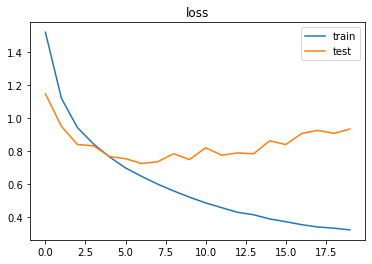

In [11]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.title('loss')
plt.plot(np.arange(len(train_loss)), train_loss, label='train')
plt.plot(np.arange(len(test_loss)), test_loss, label='test')
plt.legend()
plt.show()

history.history['accuracy']：訓練データの精度  
history.history['val_accuracy']：テストデータの精度

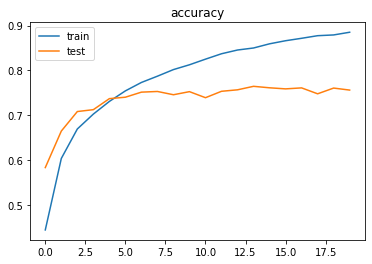

In [12]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.title("accuracy")
plt.plot(np.arange(len(train_acc)), train_acc, label='train')
plt.plot(np.arange(len(test_acc)), test_acc, label='test')
plt.legend()
plt.show()

In [13]:
loss, accuracy = model.evaluate(x_test, t_test)
print("loss:", loss, "accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9331 - accuracy: 0.7561
loss: 0.933061420917511 accuracy: 0.7560999989509583
